In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=23)
# we need to ignore the y value 

In [3]:
X.shape

(1000, 2)

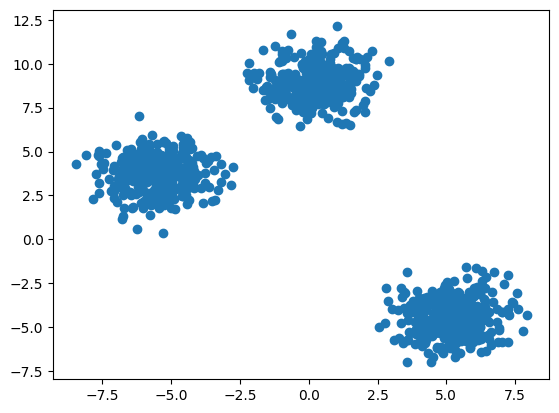

In [4]:
plt.scatter(X[:,0], X[:,1])